In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [5]:
test = pd.read_csv('test.csv')

In [6]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [7]:
mediana_mt = train['NU_NOTA_MT'].median()
mediana_mt

461.2

In [8]:
mediana_ch = train['NU_NOTA_CH'].median()
mediana_cn = train['NU_NOTA_CN'].median()
mediana_lc =  train['NU_NOTA_LC'].median()

In [9]:
train['NU_NOTA_MT'].fillna(value=mediana_mt, inplace=True)

In [10]:
train['NU_NOTA_CH'].fillna(value=mediana_ch, inplace=True)
train['NU_NOTA_CN'].fillna(value=mediana_cn, inplace=True)
train['NU_NOTA_LC'].fillna(value=mediana_lc, inplace=True)

In [11]:
train['NU_IDADE'].isnull().sum()

0

In [15]:
train['TP_SEXO'].head()

0    1
1    0
2    0
3    0
4    1
Name: TP_SEXO, dtype: int64

In [13]:
def sexo(sexo):
    if sexo == 'F':
        return 0
    else:
        return 1

In [14]:
train["TP_SEXO"] = train['TP_SEXO'].apply(sexo)

In [16]:
train[['NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC']].corr()

,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC
NU_NOTA_MT,1.000000,0.517392,0.581497,0.487924
NU_NOTA_CH,0.517392,1.000000,0.605193,0.678658
NU_NOTA_CN,0.581497,0.605193,1.000000,0.530812
NU_NOTA_LC,0.487924,0.678658,0.530812,1.000000


In [144]:
X = train.loc[:, ['NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','TP_SEXO','TP_ESCOLA','CO_UF_RESIDENCIA','NU_IDADE','TP_DEPENDENCIA_ADM_ESC','Q006','Q024','Q025','Q047']].values
X1 = train.loc[:, ['NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','TP_DEPENDENCIA_ADM_ESC','Q006','Q024','Q025','Q047']].values

In [145]:
y = train['NU_NOTA_MT'].values

In [142]:
#['NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','TP_SEXO','TP_ESCOLA','CO_UF_RESIDENCIA','NU_IDADE','TP_DEPENDENCIA_ADM_ESC']
correlacao = train[['NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','TP_DEPENDENCIA_ADM_ESC','Q006','Q024','Q025','Q047']].corr()

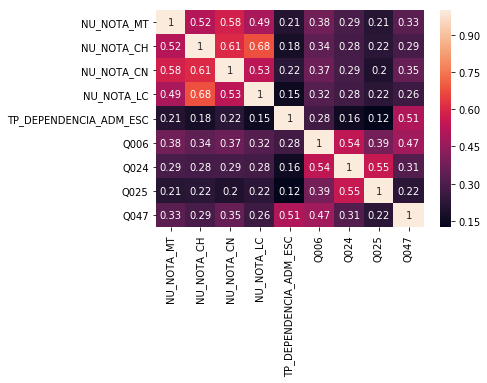

In [143]:
sns.heatmap(correlacao, annot=True)

In [27]:
mediana_dp = train['TP_DEPENDENCIA_ADM_ESC'].median()
train['TP_DEPENDENCIA_ADM_ESC'] = train['TP_DEPENDENCIA_ADM_ESC'].fillna(value=mediana_dp)

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
labelencoder_1 = LabelEncoder()
labelencoder_2 = LabelEncoder()
labelencoder_3 = LabelEncoder()
labelencoder_4 = LabelEncoder()
labelencoder_5 = LabelEncoder()
labelencoder_6 = LabelEncoder()
labelencoder_7 = LabelEncoder()
labelencoder_8 = LabelEncoder()

In [42]:
train['Q001'] = labelencoder_1.fit_transform(train['Q001'])
train['Q002'] = labelencoder_2.fit_transform(train['Q002'])
train['Q006'] = labelencoder_3.fit_transform(train['Q006'])
train['Q024'] = labelencoder_4.fit_transform(train['Q024'])
train['Q025'] = labelencoder_5.fit_transform(train['Q025'])
train['Q026'] = labelencoder_6.fit_transform(train['Q026'])
train['Q047'] = labelencoder_7.fit_transform(train['Q047'])

In [41]:
train[['Q001','Q002','Q006','Q024','Q025','Q026','Q047']].isnull().sum()

Q001    0
Q002    0
Q006    0
Q024    0
Q025    0
Q026    0
Q047    0
dtype: int64

In [71]:
modelo = LinearRegression()

In [174]:
modelo.fit(X1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [175]:
modelo.intercept_

13.791048195998087

In [176]:
modelo.coef_

array([0.19534287, 0.47790908, 0.21292287, 4.70993618, 3.18830754,
       3.57092769, 1.91251991, 4.72790044])

In [159]:
treinar = test[['NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','TP_SEXO','TP_ESCOLA','CO_UF_RESIDENCIA','NU_IDADE','TP_DEPENDENCIA_ADM_ESC','Q006','Q024','Q025','Q047']]
treinar1 = test[['NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','TP_DEPENDENCIA_ADM_ESC','Q006','Q024','Q025','Q047']]

In [160]:
treinar1.head()

,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,TP_DEPENDENCIA_ADM_ESC,Q006,Q024,Q025,Q047
0,443.5,464.8,431.8,NaN,C,A,A,A
1,491.1,391.1,548.0,NaN,C,B,B,A
2,622.7,595.9,613.6,2.0,D,B,B,A
3,NaN,NaN,NaN,NaN,G,B,B,A
4,492.6,592.9,571.4,2.0,H,C,B,A


In [168]:
def sexo_t(sexo):
    if sexo == 'F':
        return 0
    else:
        return 1

In [169]:
treinar['TP_SEXO'] = treinar['TP_SEXO'].apply(sexo_t)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [161]:
mediana_tr = treinar['TP_DEPENDENCIA_ADM_ESC'].median()
treinar['TP_DEPENDENCIA_ADM_ESC'] = treinar['TP_DEPENDENCIA_ADM_ESC'].fillna(value=mediana_tr)
mediana_tr1 = treinar1['TP_DEPENDENCIA_ADM_ESC'].median()
treinar1['TP_DEPENDENCIA_ADM_ESC'] = treinar1['TP_DEPENDENCIA_ADM_ESC'].fillna(value=mediana_tr1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [162]:
treinar1['Q006'] = labelencoder_3.fit_transform(treinar1['Q006'])
treinar1['Q024'] = labelencoder_4.fit_transform(treinar1['Q024'])
treinar1['Q025'] = labelencoder_5.fit_transform(treinar1['Q025'])
treinar1['Q047'] = labelencoder_7.fit_transform(treinar1['Q047'])
treinar['Q006'] = labelencoder_3.fit_transform(treinar['Q006'])
treinar['Q024'] = labelencoder_4.fit_transform(treinar['Q024'])
treinar['Q025'] = labelencoder_5.fit_transform(treinar['Q025'])
treinar['Q047'] = labelencoder_7.fit_transform(treinar['Q047'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [163]:
medianat_ch = treinar['NU_NOTA_CH'].median()
medianat_cn = treinar['NU_NOTA_CN'].median()
medianat_lc =  treinar['NU_NOTA_LC'].median()
treinar['NU_NOTA_CH'].fillna(value=medianat_ch, inplace=True)
treinar['NU_NOTA_CN'].fillna(value=medianat_cn, inplace=True)
treinar['NU_NOTA_LC'].fillna(value=medianat_lc, inplace=True)
medianat_ch = treinar1['NU_NOTA_CH'].median()
medianat_cn = treinar1['NU_NOTA_CN'].median()
medianat_lc =  treinar1['NU_NOTA_LC'].median()
treinar1['NU_NOTA_CH'].fillna(value=medianat_ch, inplace=True)
treinar1['NU_NOTA_CN'].fillna(value=medianat_cn, inplace=True)
treinar1['NU_NOTA_LC'].fillna(value=medianat_lc, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [177]:
#treinado = modelo.predict(treinar)
treinado1 = modelo.predict(treinar1)

In [178]:
submissao = pd.DataFrame({
    'NU_INSCRICAO': test.NU_INSCRICAO,
    'NU_NOTA_MT': treinado1
})

In [179]:
submissao.to_csv('answer1.csv', index=False)

In [107]:
from sklearn import tree

In [119]:
arvore = tree.DecisionTreeRegressor()

In [112]:
labelencoderT1 = LabelEncoder()
labelencoderT2 = LabelEncoder()

In [120]:
arvore.fit(X1, y1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [121]:
treinado1 = arvore.predict(treinar)

In [122]:
submissao1 = pd.DataFrame({
    'NU_INSCRICAO': test.NU_INSCRICAO,
    'NU_NOTA_MT': treinado1
})

In [123]:
submissao.to_csv('answer1.csv', index=False)